<h1>Dhruv Darda</h1>

<b>Data Science and Business Analytics Intern<b>
<p>Task 1: 
Predict the percentage of student based on the number of study hours.

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn import svm

%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()
#df = pd.DataFrame()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [1]:
df.plot(x='Hours', y='Scores', style = '-o')
plt.show()

NameError: name 'df' is not defined

In [161]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [162]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [175]:
lr = LinearRegression()
rkf = RepeatedKFold(n_repeats = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [176]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [177]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
lr.fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
lr.score(X_test_transformed, y_test)

0.9454906892105355

In [178]:
y_pred = lr.predict(X_test_transformed)
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.18385989900298


In [179]:
hours = [[9.25]]
hours_t = scaler.transform(hours)
own_pred = lr.predict(hours_t)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


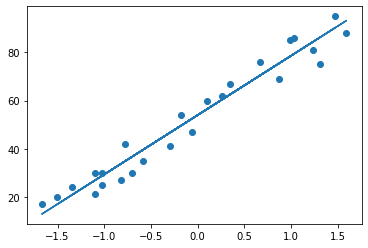

In [180]:
X_t = scaler.transform(X)
line = lr.coef_*X_t + lr.intercept_


plt.scatter(X_t, y)
plt.plot(X_t, line);
plt.show()